# Data Gov Singapore

- Explore public data made available by data.gov.sg.
- https://data.gov.sg/developer

In [77]:
import requests # HTTP requests (GET / POST)
import datetime
import pandas as pd
from IPython.display import display, Image
import folium
import json

### 1. IPOS Applications API
- https://data.gov.sg/dataset/ipos-apis
- Intellectual Property of Singapore (IPOS)
- Get design applications lodged with IPOS
- Parameters:
    - lodgement_date (string): YYYY-MM-DD


In [5]:
today = datetime.datetime.today()
dateRange = [today - datetime.timedelta(days=i) for i in range(365)]

print("Searching:")
for date in dateRange:
    params = {"lodgement_date": date.strftime("%Y-%m-%d")} # YYYY-MM-DD 
    ipos = requests.get('https://api.data.gov.sg/v1/technology/ipos/designs', params=params)
    print("No items found for: ", date)
    if ipos.json()["items"]: # Not empty
        print("Found first item at: ", date)
        break
# print(ipos.status_code)

Searching:
No items found for:  2021-01-10 19:08:32.575242
No items found for:  2021-01-09 19:08:32.575242
No items found for:  2021-01-08 19:08:32.575242
No items found for:  2021-01-07 19:08:32.575242
No items found for:  2021-01-06 19:08:32.575242
No items found for:  2021-01-05 19:08:32.575242
No items found for:  2021-01-04 19:08:32.575242
No items found for:  2021-01-03 19:08:32.575242
No items found for:  2021-01-02 19:08:32.575242
No items found for:  2021-01-01 19:08:32.575242
No items found for:  2020-12-31 19:08:32.575242
No items found for:  2020-12-30 19:08:32.575242
No items found for:  2020-12-29 19:08:32.575242
No items found for:  2020-12-28 19:08:32.575242
No items found for:  2020-12-27 19:08:32.575242
No items found for:  2020-12-26 19:08:32.575242
No items found for:  2020-12-25 19:08:32.575242
No items found for:  2020-12-24 19:08:32.575242
No items found for:  2020-12-23 19:08:32.575242
No items found for:  2020-12-22 19:08:32.575242
No items found for:  2020-12-

In [161]:
# We can better view json files better with a dataframe
pd.DataFrame(ipos.json()['items'])

,limitations,summary,invalidations,renewals,refusals,changesinOwnership,documents,nameAndAddressOfTheCreatorOfTheDesign,renunciations,applicationNum,statementsOfGrantOfProtection,stateInWhichOwnerHasARealAndEffectiveIndustrialOrCommercialEstablishment,fusionMergersOfInternationalRegistrations,changesInNameAddressOfTheHolder
0,None,"{'country': 'Italy', 'bulletinNum': '38/2020',...",None,None,None,None,[{'fileName': 'e5ecf4fe-4389-4542-8177-0622942...,"Michael ANASTASSIADES, c/o ARES S.R.L. - SOCIO...",None,D210228,None,Italy,None,None
1,None,"{'country': 'Italy', 'bulletinNum': '38/2020',...",None,None,None,None,[{'fileName': '8507c5ef-cb25-413e-bbd7-0d0eda5...,"Michael ANASTASSIADES, c/o ARES S.R.L. - SOCIO...",None,D210231,None,Italy,None,None
2,None,"{'country': 'Italy', 'bulletinNum': '38/2020',...",None,None,None,None,[{'fileName': '80c23690-62da-49aa-8623-05f5fe8...,"Antonio CITTERIO, c/o ARES S.R.L. - SOCIO UNIC...",None,D210236,None,Italy,None,None


In [216]:
# Under a license, there are multiple files inside
len(ipos.json()['items'][0]['documents'])

121

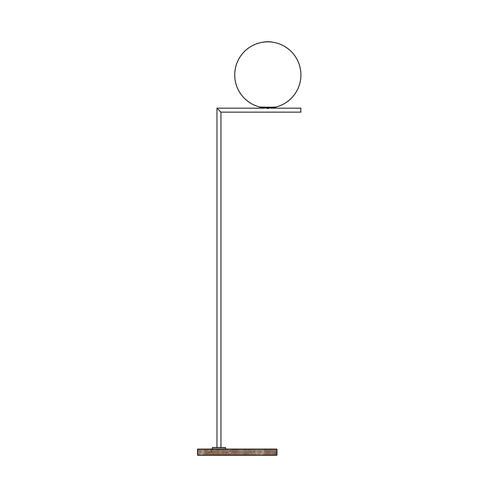

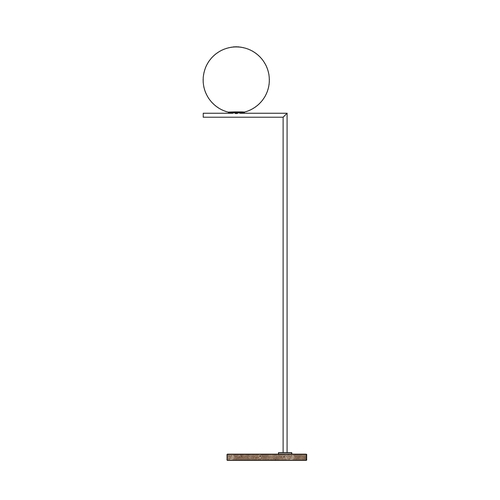

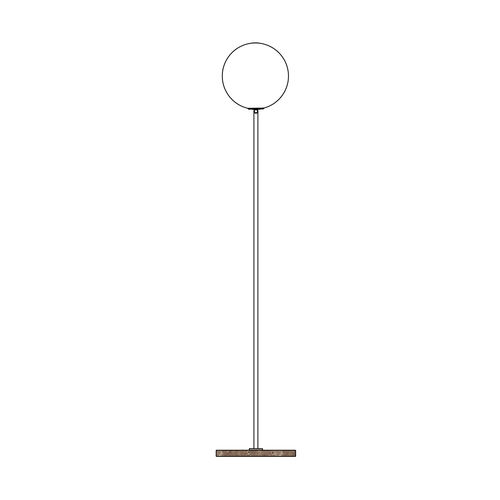

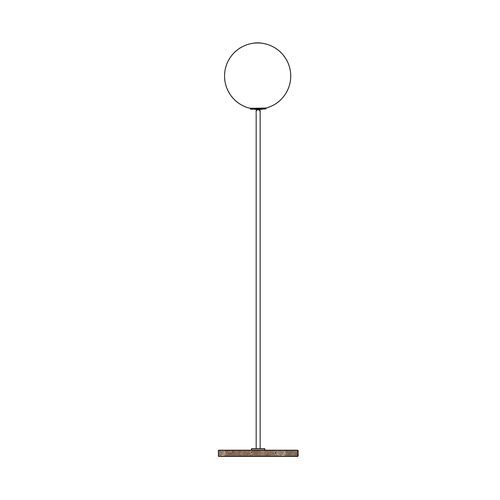

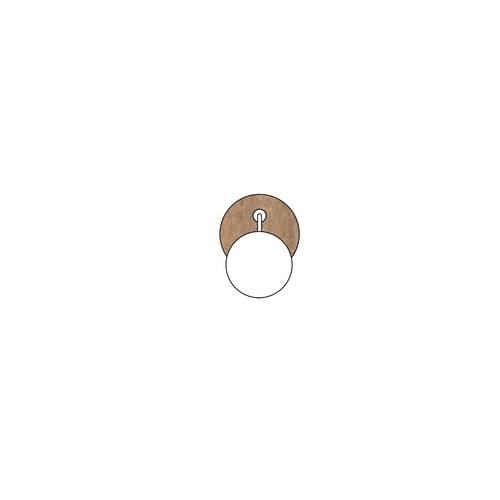

In [6]:
# We can display content of images through GET request
from IPython.display import display, Image

# for i in range(1, len(ipos.json()['items'][0]['documents'])):
for i in range(1, 6):
    display(Image(requests.get(ipos.json()['items'][0]['documents'][i]['url']).content))

### 2. Pollutant Standards Index (PSI) API
- https://data.gov.sg/dataset/psi
- Updated hourly from NEA.
- Readings are provided for each major region in Singapore
- The region_metadata field in the response provides longitude/latitude information for the regions. You can use that to place the readings on a map.
- Use the date_time parameter to retrieve the latest PSI readings at that moment in time.
- Use the date parameter to retrieve all of the readings for that day.
- Parameters:
    - date_time (string): YYYY-MM-DD[T]HH:mm:ss (SGT)
    - date (string): YYYY-MM-DD

In [92]:
# Obtaining today's PSI
today = datetime.datetime.today()
params = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD 
psi = requests.get('https://api.data.gov.sg/v1/environment/psi', params=params).json()

In [93]:
# Showing latest PSI in a dataframe
print(psi['items'][0]['timestamp']) # 12am GMT+8
pd.DataFrame(psi['items'][0]['readings']) # 

2021-01-10T01:00:00+08:00


,o3_sub_index,pm10_twenty_four_hourly,pm10_sub_index,co_sub_index,pm25_twenty_four_hourly,so2_sub_index,co_eight_hour_max,no2_one_hour_max,so2_twenty_four_hourly,pm25_sub_index,psi_twenty_four_hourly,o3_eight_hour_max
west,11,20,20,5,5,2,0.53,8,3,20,20,26
national,13,25,25,6,14,2,0.58,27,3,53,20,31
east,13,21,21,6,8,1,0.58,19,2,34,34,31
central,6,25,25,4,7,2,0.40,27,3,28,28,15
south,12,24,24,5,14,2,0.52,21,3,53,53,27
north,12,20,20,3,8,2,0.34,25,3,34,34,29


**Replicating map of latest PSI:**

https://data.gov.sg/dataset/psi?view_id=d57fb838-2ccc-4d5c-9adc-907b34185e5c&resource_id=82776919-0de1-4faf-bd9e-9c997f9a729d

In [101]:
# View latest PSI on SG folium map
sg_map = folium.Map([1.3521, 103.8198], zoom_start = 11.5, tiles="Stamen Terrain")
for location in psi['region_metadata']:
    temp = json.loads(pd.DataFrame(psi['items'][-1]['readings']).loc[location['name'], :].to_json())
    folium.Marker([location['label_location']['latitude'], location['label_location']['longitude']],
                   popup = "\n".join(["{}:{}".format(k, v) for k, v in temp.items()]), 
                   tooltip = location['name'].capitalize()).add_to(sg_map)
sg_map

**24-hr PSI:**

- Readings from all area
- Data of only 'psi_twenty_four_hourly'

https://data.gov.sg/dataset/psi?view_id=5897450a-1536-40a2-953e-2c8981347b0c&resource_id=82776919-0de1-4faf-bd9e-9c997f9a729d

In [165]:
# Obtaining today's PSI
today = datetime.datetime.today()
yesterday = datetime.datetime.today() - datetime.timedelta(days=1)
params_today = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD
params_yesterday = {"date": yesterday.strftime("%Y-%m-%d")} # YYYY-MM-DD
psi_today = requests.get('https://api.data.gov.sg/v1/environment/psi', params=params_today).json()
psi_yst = requests.get('https://api.data.gov.sg/v1/environment/psi', params=params_yesterday).json()
time_today = [i['timestamp'] for i in psi_today['items']]
time_yst = [i['timestamp'] for i in psi_yst['items']]
plottingDf = pd.concat([pd.DataFrame([i['readings']['psi_twenty_four_hourly'] for i in psi_yst['items']], index=time_yst),
                        pd.DataFrame([i['readings']['psi_twenty_four_hourly'] for i in psi_today['items']], index=time_today)])
plottingDf.index = pd.to_datetime(plottingDf.index)
plottingDf.index = [i.strftime("%Y-%m-%d %H:%M:%S") for i in plottingDf.index]

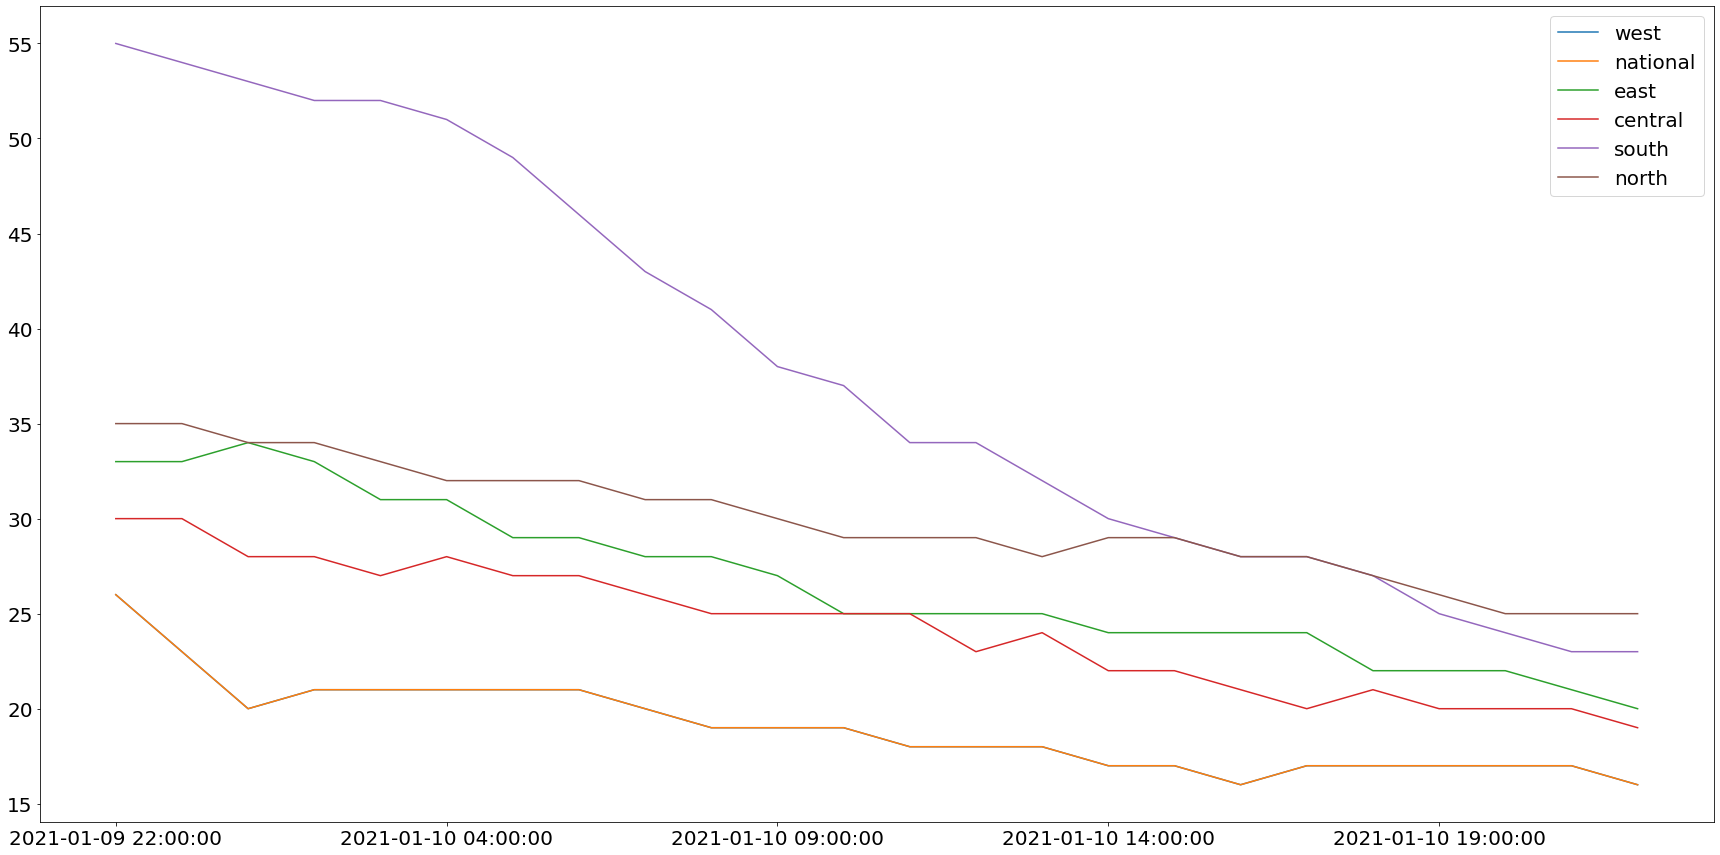

In [168]:
ax = plottingDf.iloc[-24:].plot(figsize=(30, 15))
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)
ax.legend(fontsize=20)

**Pollutant Sub-Indices:**

- National Readings
- Other indices besides 'psi_twenty_four_hourly' (I did not choose to filter in this case)

https://data.gov.sg/dataset/psi?view_id=942289fe-4b23-40b8-8c9a-7ac58cf2b237&resource_id=82776919-0de1-4faf-bd9e-9c997f9a729d

In [190]:
plottingDf1 = pd.concat([pd.DataFrame([{k:v['national'] for k, v in i['readings'].items() if k != 'psi_twenty_four_hourly'} for i in psi_yst['items']], index=time_yst),
                        pd.DataFrame([{k:v['national'] for k, v in i['readings'].items() if k != 'psi_twenty_four_hourly'} for i in psi_today['items']], index=time_today)])
plottingDf1.index = pd.to_datetime(plottingDf1.index)
plottingDf1.index = [i.strftime("%Y-%m-%d %H:%M:%S") for i in plottingDf1.index]

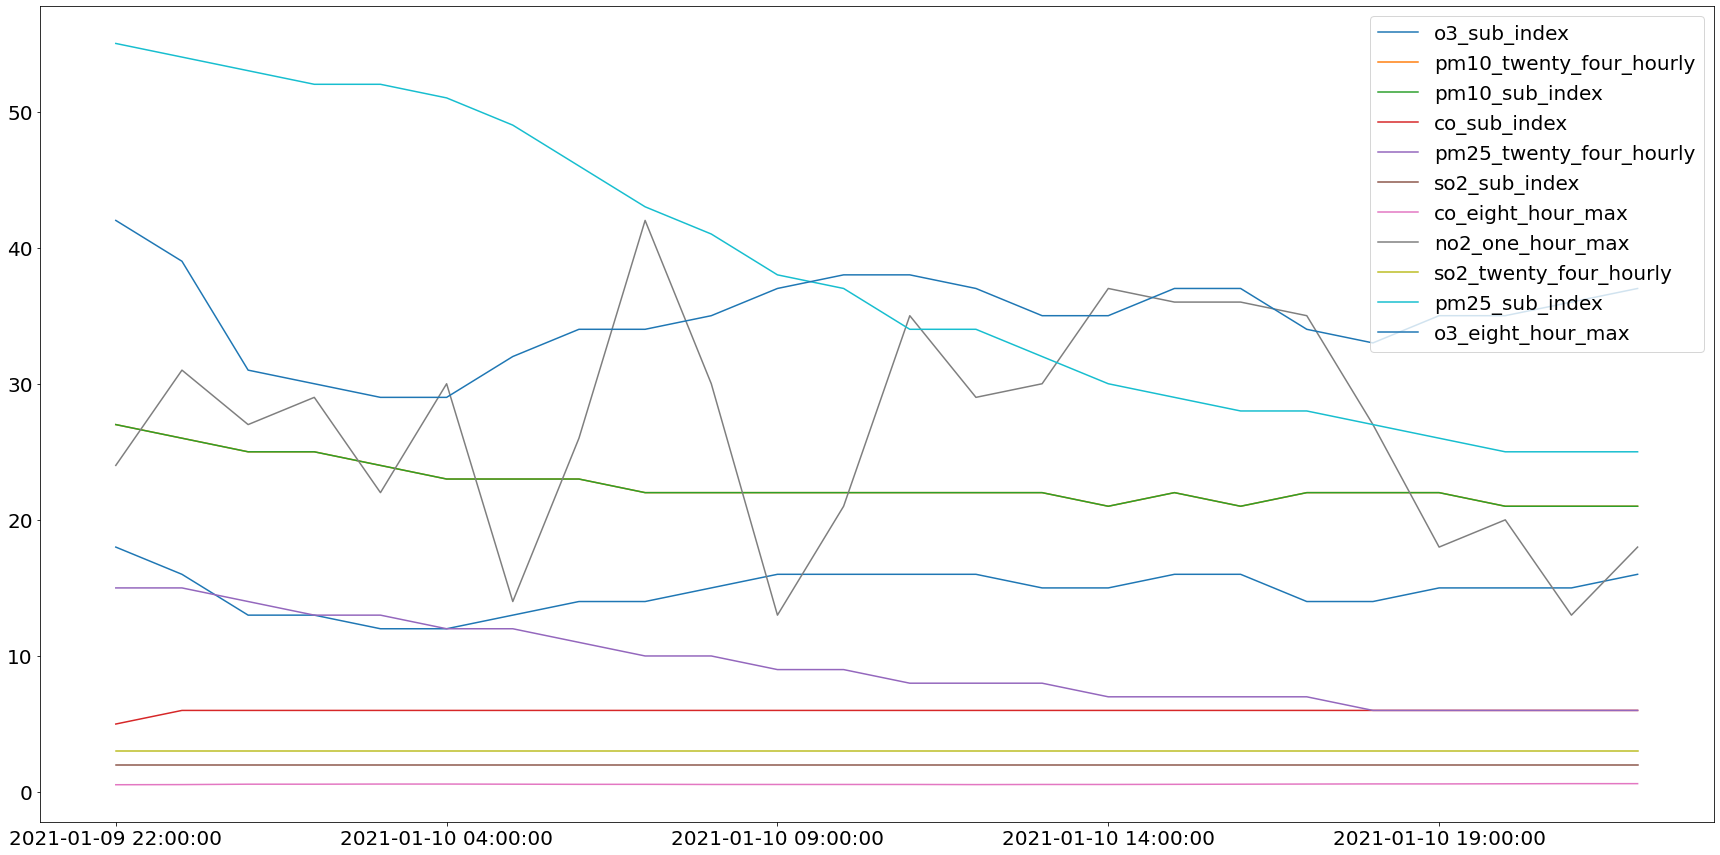

In [191]:
ax = plottingDf1.iloc[-24:].plot(figsize=(30, 15))
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)
ax.legend(fontsize=20)

### 3. Carpark Availability API
- https://data.gov.sg/dataset/carpark-availability
- Retrieved every minute
- Use the date_time parameter to retrieve the latest carpark availability at that moment in time
- Detailed carpark information can be found at https://data.gov.sg/dataset/hdb-carpark-information
- We recommend that this endpoint be called every minute
- Parameters:
    - date_time (string): YYYY-MM-DD[T]HH:mm:ss (SGT)

In [211]:
# Obtaining carpark availability
today = datetime.datetime.today()
params = {"date_time": today.strftime("%Y-%m-%dT%H:%M:%S")} # YYYY-MM-DD 
car = requests.get('https://api.data.gov.sg/v1/transport/carpark-availability', params=params).json()
len(car['items'][0]['carpark_data']) # Amount of instances retrieved per API call

2072

In [221]:
car['items'][0]['carpark_data'][0]

{'carpark_info': [{'total_lots': '91',
   'lot_type': 'C',
   'lots_available': '9'}],
 'carpark_number': 'HE12',
 'update_datetime': '2021-01-11T20:43:39'}

A single instance of data is not very useful as there are no coordinates attributes to plot with it.

### 4. Realtime Weather Readings API
- https://data.gov.sg/dataset/realtime-weather-readings
- Has per-minute readings from NEA
- Use the date_time parameter to retrieve the latest available data at that moment in time
- Use the date parameter to retrieve all of the readings for that day.
- Parameters:
    - date_time (string): YYYY-MM-DD[T]HH:mm:ss (SGT)
    - date (string): YYYY-MM-DD

In [222]:
# Obtaining temperature data
today = datetime.datetime.today()
params = {"date_time": today.strftime("%Y-%m-%dT%H:%M:%S")} # YYYY-MM-DD 
wx = requests.get('https://api.data.gov.sg/v1/environment/air-temperature', params=params).json()

In [318]:
tempDf = pd.DataFrame(wx['metadata']['stations']).merge(pd.DataFrame(wx['items'][0]['readings']), left_on='id', right_on='station_id', how='inner')
tempDf = tempDf[["station_id", "name", "value", "location"]]
tempDf.columns = ['Station ID', 'Name', 'Temperature', "Location"]
tempDf

,Station ID,Name,Temperature,Location
0,S107,East Coast Parkway,26.0,"{'latitude': 1.3135, 'longitude': 103.9625}"
1,S43,Kim Chuan Road,26.0,"{'latitude': 1.3399, 'longitude': 103.8878}"
2,S108,Marina Gardens Drive,26.0,"{'latitude': 1.2799, 'longitude': 103.8703}"
3,S44,Nanyang Avenue,24.4,"{'latitude': 1.34583, 'longitude': 103.68166}"
4,S106,Pulau Ubin,25.1,"{'latitude': 1.4168, 'longitude': 103.9673}"
5,S111,Scotts Road,24.8,"{'latitude': 1.31055, 'longitude': 103.8365}"
6,S115,Tuas South Avenue 3,25.2,"{'latitude': 1.29377, 'longitude': 103.61843}"
7,S116,West Coast Highway,25.5,"{'latitude': 1.281, 'longitude': 103.754}"
8,S104,Woodlands Avenue 9,25.2,"{'latitude': 1.44387, 'longitude': 103.78538}"


In [320]:
# View latest PSI on SG folium map
sg_map = folium.Map([1.3521, 103.8198], zoom_start = 11, tiles="Stamen Terrain")
for _, a in tempDf.iterrows():
    folium.Marker([a['Location']['latitude'], a['Location']['longitude']],
#                    popup = "\n".join({"{}:{}".format(k, v) for k, v in station.items() if k != 'location'}), 
                   popup = "\n".join(["{}: {}".format(k, v) for k, v in a.items() if k!='Location' and k!='Station ID']),
                   tooltip = a['Name']).add_to(sg_map)
sg_map

### 5. Ultra-violet Index (UVI) API
- https://data.gov.sg/dataset/ultraviolet-index-uvi
- Updated every hour between 7 AM and 7 PM everyday
- The UV index value is averaged over the preceeding hour
- Use the date_time parameter to retrieve the latest forecast issued at that moment in time.
- Use the date parameter to retrieve all of the forecasts issued for that day
- Parameters:
    - date_time (string): YYYY-MM-DD[T]HH:mm:ss (SGT)
    - date (string): YYYY-MM-DD

In [326]:
# Obtaining UVI data
today = datetime.datetime.today() - datetime.timedelta(days=1)
params = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD 
uv = requests.get('https://api.data.gov.sg/v1/environment/uv-index', params=params).json()

In [330]:
# Obtain UVI Status for past 30 days
for i in range(30):
    date = datetime.datetime.today() - datetime.timedelta(days=i)
    params = {"date": date.strftime("%Y-%m-%d")} # YYYY-MM-DD 
    uv = requests.get('https://api.data.gov.sg/v1/environment/uv-index', params=params).json()
    print("UVI for {}: {}".format(date.strftime("%Y-%m-%d"), uv['api_info']['status']))

UVI for 2021-01-11: healthy
UVI for 2021-01-10: healthy
UVI for 2021-01-09: healthy
UVI for 2021-01-08: healthy
UVI for 2021-01-07: healthy
UVI for 2021-01-06: healthy
UVI for 2021-01-05: healthy
UVI for 2021-01-04: healthy
UVI for 2021-01-03: healthy
UVI for 2021-01-02: healthy
UVI for 2021-01-01: healthy
UVI for 2020-12-31: healthy
UVI for 2020-12-30: healthy
UVI for 2020-12-29: healthy
UVI for 2020-12-28: healthy
UVI for 2020-12-27: healthy
UVI for 2020-12-26: healthy
UVI for 2020-12-25: healthy
UVI for 2020-12-24: healthy
UVI for 2020-12-23: healthy
UVI for 2020-12-22: healthy
UVI for 2020-12-21: healthy
UVI for 2020-12-20: healthy
UVI for 2020-12-19: healthy
UVI for 2020-12-18: healthy
UVI for 2020-12-17: healthy
UVI for 2020-12-16: healthy
UVI for 2020-12-15: healthy
UVI for 2020-12-14: healthy
UVI for 2020-12-13: healthy


### 6. Taxi Availability API
- https://data.gov.sg/dataset/ultraviolet-index-uvi
- Retrieved every 30 seconds from LTA's Datamall.
- The response is a valid GeoJSON which you could insert into a mapping tool like Leaflet
- As LTA does not provide any kind of metadata, the timestamp provided in the response is the scrape time
- We recommend that this endpoint be called every minute
- Use the date_time parameter to retrieve the latest available data at that moment in time
- Parameters:
    - date_time (string): YYYY-MM-DD[T]HH:mm:ss (SGT)
    - date (string): YYYY-MM-DD

In [357]:
# Taxi availability data
today = datetime.datetime.today() 
params = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD 
taxi = requests.get('https://api.data.gov.sg/v1/transport/taxi-availability', params=params).json()
taxi['features'][0]['properties']['taxi_count']

3365

In [358]:
# Plotting first 100 taxis only
sg_map = folium.Map([1.3521, 103.8198], zoom_start = 11, tiles="Stamen Terrain")
for coord in taxi['features'][0]['geometry']['coordinates'][:100]:
    folium.Marker([coord[1], coord[0]]).add_to(sg_map)
sg_map

### 7. PM2.5 API
- https://data.gov.sg/dataset/pm2-5
- Updated hourly from NEA.
- Readings are provided for each major region in Singapore
- The region_metadata field in the response provides longitude/latitude information for the regions. You can use that to place the readings on a map.
- Use the date_time parameter to retrieve the latest PM2.5 readings at that moment in time
- Use the date parameter to retrieve all of the readings for that day
- Parameters:
    - date_time (string): YYYY-MM-DD[T]HH:mm:ss (SGT)
    - date (string): YYYY-MM-DD

In [415]:
# PM2.5 data
today = datetime.datetime.today() 
params = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD 
pm2_5 = requests.get('https://api.data.gov.sg/v1/environment/pm25', params=params).json()

**Replicating map of latest PM2.5:**

https://data.gov.sg/dataset/pm2-5?view_id=19acb1a8-ceda-4c9a-aff8-1adcd8e70b1c&resource_id=fa0958a9-bade-419e-9475-cbf5ccf4f746

In [409]:
# View latest PM2.5 on SG folium map
plotDf = pd.DataFrame(pm2_5['region_metadata']).merge(pd.DataFrame(pm2_5['items'][-1]['readings']).reset_index(), how='inner', left_on='name', right_on='index')
sg_map = folium.Map([1.3521, 103.8198], zoom_start = 11.5, tiles="Stamen Terrain")
for _, v in plotDf.iterrows():
    folium.Marker([v['label_location']['latitude'], v['label_location']['longitude']],
                   popup = "PM2.5 Hourly: " + str(v['pm25_one_hourly']), 
                   tooltip = v['name'].capitalize()).add_to(sg_map)
sg_map

**24-hr PM2.5:**

https://data.gov.sg/dataset/pm2-5?view_id=10bc3328-d9cf-4259-afe9-2955a3a0e811&resource_id=fa0958a9-bade-419e-9475-cbf5ccf4f746

In [413]:
# Obtaining today's PSI
today = datetime.datetime.today()
yesterday = datetime.datetime.today() - datetime.timedelta(days=1)
params_today = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD
params_yesterday = {"date": yesterday.strftime("%Y-%m-%d")} # YYYY-MM-DD
pm2_5_today = requests.get('https://api.data.gov.sg/v1/environment/pm25', params=params_today).json()
pm2_5_yst = requests.get('https://api.data.gov.sg/v1/environment/pm25', params=params_yesterday).json()
time_today = [i['timestamp'] for i in pm2_5_today['items']]
time_yst = [i['timestamp'] for i in pm2_5_yst['items']]
plottingDf = pd.concat([pd.DataFrame([i['readings']['pm25_one_hourly'] for i in pm2_5_today['items']], index=time_yst),
                        pd.DataFrame([i['readings']['pm25_one_hourly'] for i in pm2_5_yst['items']], index=time_today)])
plottingDf.index = pd.to_datetime(plottingDf.index)
plottingDf.index = [i.strftime("%Y-%m-%d %H:%M:%S") for i in plottingDf.index]

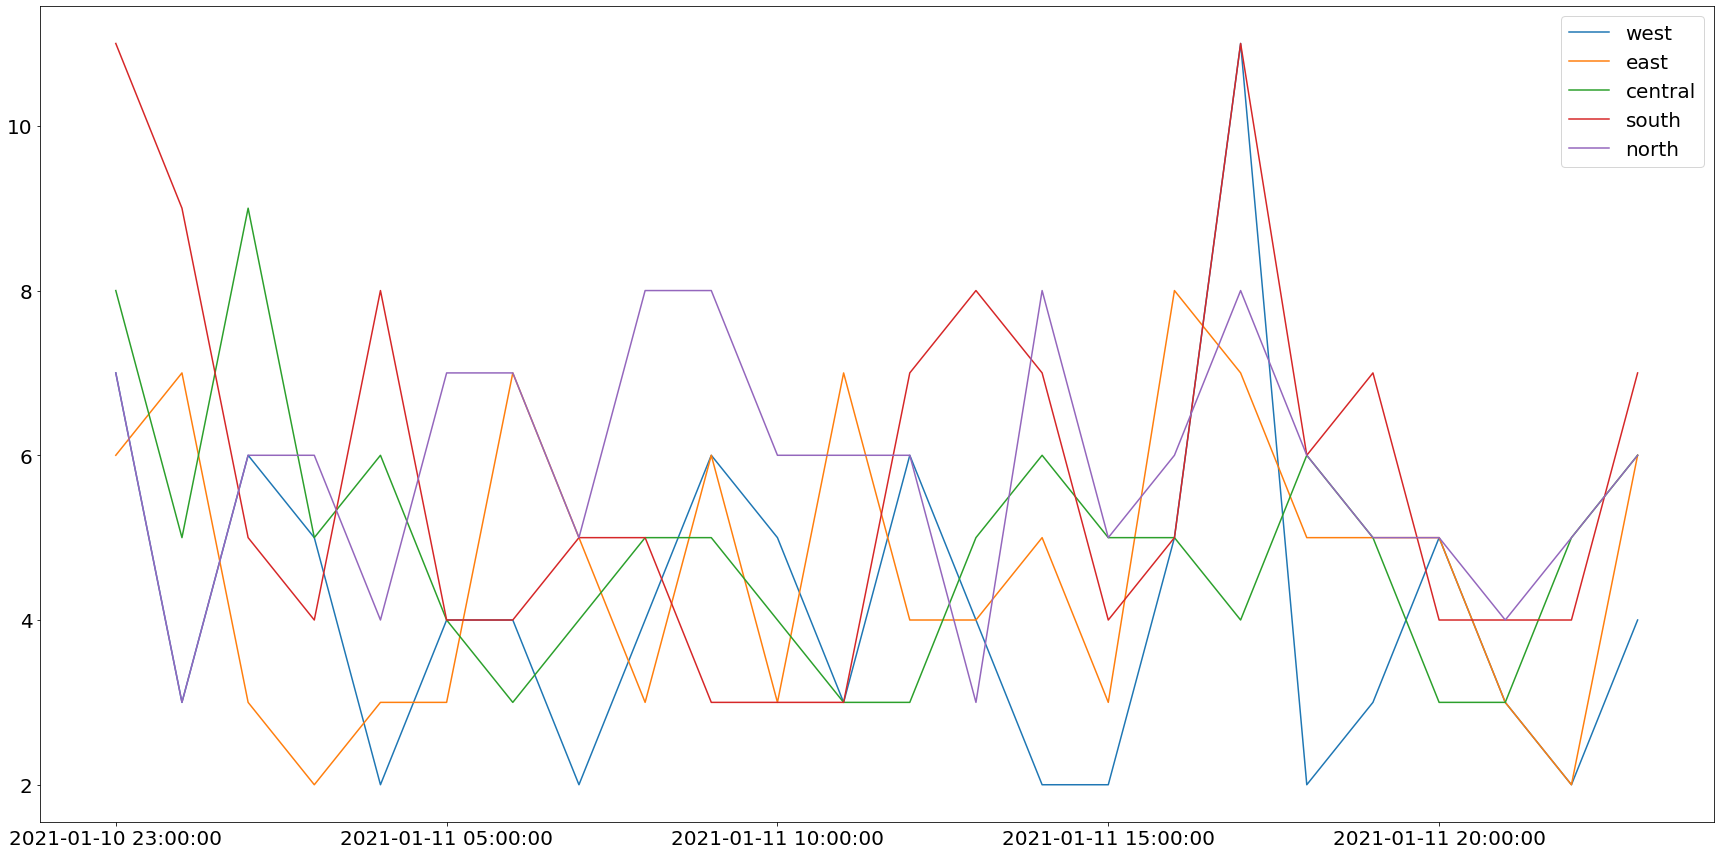

In [414]:
ax = plottingDf.iloc[-24:].plot(figsize=(30, 15))
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)
ax.legend(fontsize=20)

### 8. Weather Forecast

- https://data.gov.sg/dataset/weather-forecast
- Updated half-hourly from NEA
- Forecasts are given for multiple areas in Singapore
- The area_metadata field in the response provides longitude/latitude information for the areas. You can use that to place the forecasts on a map.
- Use the date_time parameter to retrieve the latest forecast issued at that moment in time.
- Use the date parameter to retrieve all of the forecasts issued for that day
- Parameters:
    - date_time (string): YYYY-MM-DD[T]HH:mm:ss (SGT)
    - date (string): YYYY-MM-DD

In [418]:
# 2-hour weather forecast data
today = datetime.datetime.today() 
params = {"date": today.strftime("%Y-%m-%d")} # YYYY-MM-DD 
wx_forecast = requests.get('https://api.data.gov.sg/v1/environment/2-hour-weather-forecast', params=params).json()

In [433]:
plotDf = pd.DataFrame(wx_forecast['area_metadata']).merge(pd.DataFrame(wx_forecast['items'][-1]['forecasts']).reset_index(), how='inner', left_on='name', right_on='area')
plotDf = plotDf[['area','forecast','label_location']]
plotDf

,area,forecast,label_location
0,Ang Mo Kio,Light Rain,"{'latitude': 1.375, 'longitude': 103.839}"
1,Bedok,Light Rain,"{'latitude': 1.321, 'longitude': 103.924}"
2,Bishan,Light Rain,"{'latitude': 1.350772, 'longitude': 103.839}"
3,Boon Lay,Light Rain,"{'latitude': 1.304, 'longitude': 103.701}"
4,Bukit Batok,Light Rain,"{'latitude': 1.353, 'longitude': 103.754}"
5,Bukit Merah,Light Rain,"{'latitude': 1.277, 'longitude': 103.819}"
6,Bukit Panjang,Light Rain,"{'latitude': 1.362, 'longitude': 103.77195}"
7,Bukit Timah,Light Rain,"{'latitude': 1.325, 'longitude': 103.791}"
8,Central Water Catchment,Light Rain,"{'latitude': 1.38, 'longitude': 103.805}"
9,Changi,Light Rain,"{'latitude': 1.357, 'longitude': 103.987}"


In [451]:
# View 2 hourly weather forecast on SG folium map
plotDf = pd.DataFrame(wx_forecast['area_metadata']).merge(pd.DataFrame(wx_forecast['items'][-1]['forecasts']).reset_index(), how='inner', left_on='name', right_on='area')
sg_map = folium.Map([1.3521, 103.8198], zoom_start = 11, tiles="Stamen Terrain")
for _, v in plotDf.iterrows():
    if v['forecast'] == "Light Rain":
        folium.Marker([v['label_location']['latitude'], v['label_location']['longitude']],
                       popup = str(v['forecast']), icon = folium.Icon(icon="tint"),
                       tooltip = v['name']).add_to(sg_map)
#     elif v['forecast'] == "Moderate Rain":
#         folium.Marker([v['label_location']['latitude'], v['label_location']['longitude']],
#                        popup = str(v['forecast']), icon = folium.Icon(icon="cloud-showers"),
#                        tooltip = v['name']).add_to(sg_map)
#     elif v['forecast'] == "Heavy Rain":
#         folium.Marker([v['label_location']['latitude'], v['label_location']['longitude']],
#                        popup = str(v['forecast']), icon = folium.Icon(icon="cloud-showers-heavy"),
#                        tooltip = v['name']).add_to(sg_map)
sg_map